# Objective
* To predict that the number of survived female passengers are more than that of male passengers.

# About Dataset
* This Dataset is the famous Titanic Survived Passengers dataset. this dataset includes 7 numerical columns and 5 categorical data columns. As we can go through the dataset it contains many null values we will be replcing them with 0, also we will be converting the categorical values into numirical values. In the later versions i will also try to include pipline so that we can implement more modeling techniques.

# **Import All the Packages Necessary**

In [174]:
import sklearn as ski
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Read the files

In [175]:
df_test = pd.read_csv("../input/titanic/test.csv")

df_train = pd.read_csv("../input/titanic/train.csv")

In [176]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [177]:
df_train.shape

(891, 12)

In [191]:
df_train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


# We can see there are few attributes which have NaN vaules replacing it with zero

In [190]:
df_train['PassengerId'] = df_train['PassengerId'].replace(np.nan, 0)
df_train['Survived'] = df_train['Survived'].replace(np.nan, 0)
df_train['Pclass'] = df_train['Pclass'].replace(np.nan, 0)
df_train['Name'] = df_train['Name'].replace(np.nan, 0)
df_train['Sex'] = df_train['Sex'].replace(np.nan, 0)
df_train['Age'] = df_train['Age'].replace(np.nan, 0)
df_train['SibSp'] = df_train['SibSp'].replace(np.nan, 0)
df_train['Parch'] = df_train['Parch'].replace(np.nan, 0)
df_train['Ticket'] = df_train['Ticket'].replace(np.nan, 0)
df_train['Fare'] = df_train['Fare'].replace(np.nan, 0)
df_train['Cabin'] = df_train['Cabin'].replace(np.nan, 0)
df_train['Embarked'] = df_train['Embarked'].replace(np.nan, 0)
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


# We are transforming the categorical data with the help of dummies i.e Sex, Embarked

* It will provide us different numerical values for categorical datas

In [192]:
df_dummies =  pd.get_dummies(df_train, columns=["Sex","Embarked"])
df_dummies.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,0,0,1


**As we can see there are many columns which are not necessary such as cabin ticket Name etc hence removing them from the dummies dataframe**

In [181]:
df_dummies.drop(['Cabin','Ticket','Name','PassengerId','SibSp'], axis=1,inplace=True)
df_dummies.head(5)

,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.00,0,7.2500,0,1,0,0,0,1
1,1,1,38.00,0,71.2833,1,0,0,1,0,0
2,1,3,26.00,0,7.9250,1,0,0,0,0,1
3,1,1,35.00,0,53.1000,1,0,0,0,0,1
4,0,3,35.00,0,8.0500,0,1,0,0,0,1
5,0,3,0.00,0,8.4583,0,1,0,0,1,0
6,0,1,54.00,0,51.8625,0,1,0,0,0,1
7,0,3,2.00,1,21.0750,0,1,0,0,0,1
8,1,3,27.00,2,11.1333,1,0,0,0,0,1
9,1,2,14.00,0,30.0708,1,0,0,1,0,0


# We are trying to see the probable relations in the dataframe.

* The relations between different columns can be found on the following basis:-
    1. if person coeffcient close to  +1 it has a Strong Positive Relation
    2. if person coeffcient is close to -1  it has Strong Negative Relation
    3. if person coeffcient is close to 0 it has no relation
* Remember Pearson coefficeint only considers int float 

In [182]:
pearson_coefficeint = df_dummies.corr(method='pearson')
pearson_coefficeint

,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,0.010539,0.081629,0.257307,0.543351,-0.543351,0.060095,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.361353,0.018443,-0.549500,-0.131900,0.131900,-0.074282,-0.243292,0.221009,0.081720
Age,0.010539,-0.361353,1.000000,-0.048786,0.135516,-0.024978,0.024978,0.070665,0.001246,-0.237586,0.140578
Parch,0.081629,0.018443,-0.048786,1.000000,0.216225,0.245489,-0.245489,-0.022467,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.135516,0.216225,1.000000,0.182333,-0.182333,0.045646,0.269335,-0.117216,-0.166603
Sex_female,0.543351,-0.131900,-0.024978,0.245489,0.182333,1.000000,-1.000000,0.064296,0.082853,0.074115,-0.125722
Sex_male,-0.543351,0.131900,0.024978,-0.245489,-0.182333,-1.000000,1.000000,-0.064296,-0.082853,-0.074115,0.125722
Embarked_0,0.060095,-0.074282,0.070665,-0.022467,0.045646,0.064296,-0.064296,1.000000,-0.022864,-0.014588,-0.076588
Embarked_C,0.168240,-0.243292,0.001246,-0.011069,0.269335,0.082853,-0.082853,-0.022864,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.237586,-0.081228,-0.117216,0.074115,-0.074115,-0.014588,-0.148258,1.000000,-0.496624


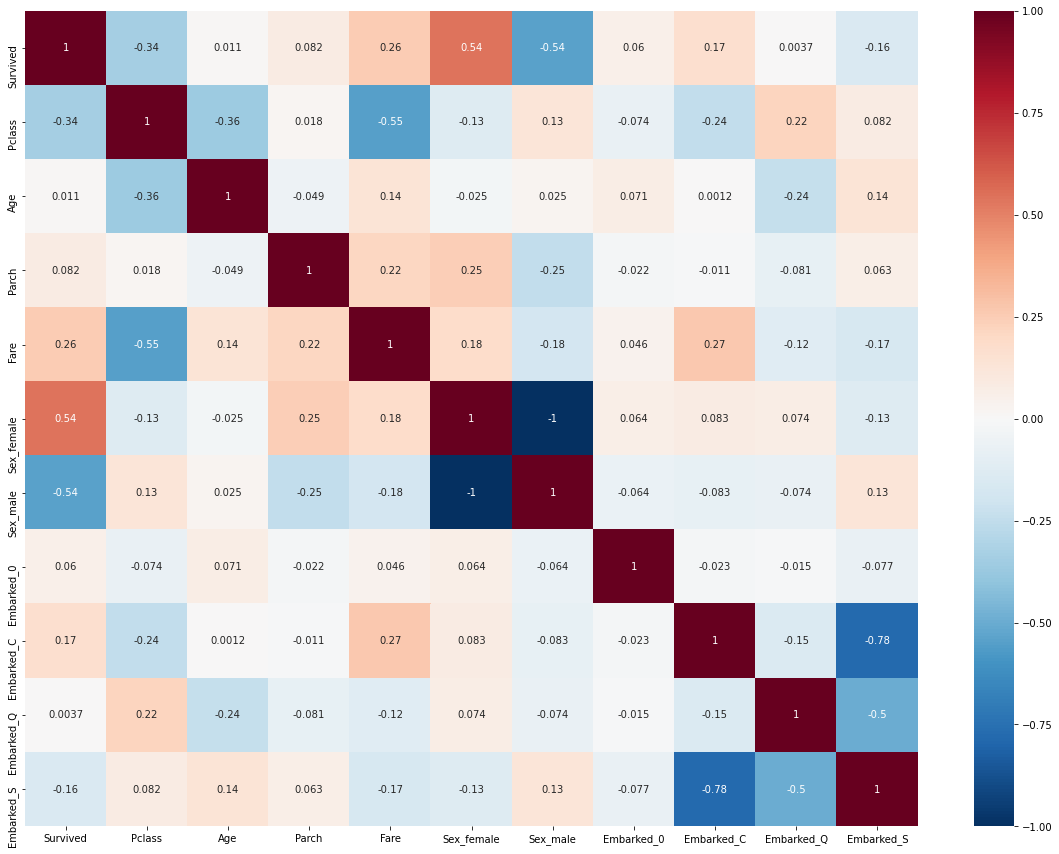

In [183]:
plt.pyplot.figure(figsize=(20,15))
sea.heatmap(pearson_coefficeint, cmap='RdBu_r',annot=True)

# Now we are spliting the data into x_train,X_test,y_train,y_test in 80:20 ratio


In [184]:
x = df_dummies[['Sex_female','Sex_male']]
y = df_dummies['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.8)


In [185]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(178, 2) (713, 2) (178,) (713,)


In [186]:
survived_tree = DecisionTreeClassifier(criterion= "entropy", max_depth= 2)
survived_tree

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [187]:
survived_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [188]:
pred_survived = survived_tree.predict(x_test)
pred_survived

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,

In [189]:
from sklearn import metrics
print("Accuracy",metrics.accuracy_score(y_test,pred_survived))

Accuracy 0.7769985974754559
